# __EDA of PUBG mobile's weapon data:__

## Tools used:

- __pandas :__ For data wrangling and sorting
- __seaborn :__ For data visualization



In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('pubg-weapon-stats.csv')

df.iloc[:5,:5]      # showing first five rows and columns

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity
0,Groza,Assault Rifle,7.62,49,30
1,AKM,Assault Rifle,7.62,49,30
2,M762,Assault Rifle,7.62,47,30
3,MK47 Mutant,Assault Rifle,7.62,49,30
4,AUG A3,Assault Rifle,5.56,43,30


In [3]:
max_dmg = df['Damage'].max()
min_dmg = df['Damage'].min()
avg_dmg = df['Damage'].mean()

print('Avg damage:',round(avg_dmg,2))

info = ['Weapon Name','Weapon Type', 'Bullet Type', 'Damage']

df[info][df['Damage'] > avg_dmg] # displaying guns with damage more than the avg damage

Avg damage: 63.34


,Weapon Name,Weapon Type,Bullet Type,Damage
18,S686,Shotgun,12.00,216
19,S1897,Shotgun,12.00,216
20,S12K,Shotgun,12.00,198
27,AWM,Sniper Rifle,0.30,105
28,M24,Sniper Rifle,7.62,79
29,Kar98,Sniper Rifle,7.62,75
30,Win94,Sniper Rifle,0.45,66
31,Sawed-Off,Pistol,12.00,160
38,Crossbow,Other,NaN,106
39,Pan,Melee,NaN,80


In [4]:
dx = df.groupby('Weapon Type')

for i in dx:
    print(i)

('Assault Rifle',    Weapon Name    Weapon Type  Bullet Type  Damage  Magazine Capacity  Range   
0        Groza  Assault Rifle         7.62      49                 30  400.0  \
1          AKM  Assault Rifle         7.62      49                 30  400.0   
2         M762  Assault Rifle         7.62      47                 30  400.0   
3  MK47 Mutant  Assault Rifle         7.62      49                 30  500.0   
4       AUG A3  Assault Rifle         5.56      43                 30  600.0   
5       SCAR-L  Assault Rifle         5.56      43                 30  600.0   
6         M416  Assault Rifle         5.56      43                 30  600.0   
7        M16A4  Assault Rifle         5.56      43                 30  600.0   
8         G36C  Assault Rifle         5.56      43                 30  600.0   
9          OBZ  Assault Rifle         5.56      43                 30  600.0   

   Bullet Speed  Rate of Fire  Shots to Kill (Chest)  Shots to Kill (Head)   
0         715.0        

In [5]:
dx = df.groupby('Bullet Type')['Damage'].mean()    #['Damage'].mean()
dx

Bullet Type
0.30     105.000000
0.45      48.200000
5.56      44.111111
7.62      56.727273
9.00      30.750000
12.00    197.500000
Name: Damage, dtype: float64

<Axes: xlabel='Damage', ylabel='Count'>

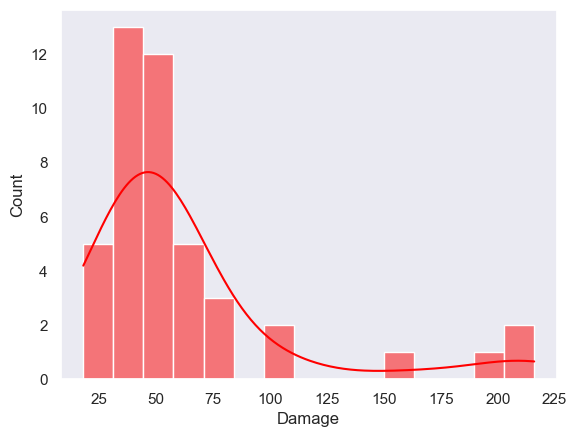

In [24]:
sns.set_theme('notebook', style = 'dark')

sns.histplot(df['Damage'],bins = 15 , color = 'red' , kde = True)

<Axes: xlabel='Bullet Type', ylabel='Damage'>

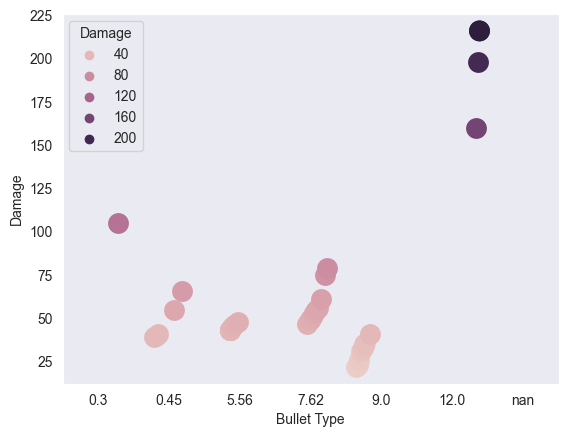

In [22]:
sns.stripplot(data=df , x= 'Bullet Type' , y = 'Damage', hue = 'Damage', dodge = True, size = 15)

### Bullet types : 

0.30 : Sniper Ammo,  
12 : Shotgun  
9.00 : 9mm : smg  
0.45 : 45 acp : smg  
5.56 : Ar,dmr  
7.62 : Ar, dmr - heavy


In [8]:
dx

Bullet Type
0.30     105.000000
0.45      48.200000
5.56      44.111111
7.62      56.727273
9.00      30.750000
12.00    197.500000
Name: Damage, dtype: float64

In [9]:
dx.describe() #dx = data frame grouped by bullete type and avg damage of each bullete type

count      6.000000
mean      80.381397
std       62.764340
min       30.750000
25%       45.133333
50%       52.463636
75%       92.931818
max      197.500000
Name: Damage, dtype: float64